In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss

tissues = ['WholeBlood','Cells-Transformedfibroblasts','Muscle-Skeletal','Lung','Artery-Tibial','Adipose-Subcutaneous', 'Esophagus-Mucosa']
tissu=tissues[1]
regr='/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/SUMMARY/LR_SummaryTest_Table.tsv'
feat='/storage/szfeupe/Runs/GTEx_estr/FEATURES/Allgencodefeatures_table'
FEAT='/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/SUMMARY/Merged_Causality_Features.tableII'
motif='/storage/resources/dbase/human/hg19/hg19.hipstr_reference_withmotif.bed'

F=[] ; G=[] ; R = []
#open files
R = pd.read_csv(regr, sep='\t')  ; X = R[["gene","chrom","str.start","eSTR_In_tissues"]]
F = pd.read_csv(FEAT, sep='\t')
G = F.merge(X, on =["gene","chrom","str.start"])

# Focus on estrs and motifs
E = G.loc[G['eSTR_In_tissues']>0]
T=list(set(list(E['motif'])))
C=[list(E['motif']).count(x) for x in T]
EM = [[x,list(E['motif']).count(x)] for x in T]
frequent_motifs=[x for x in EM if x[1]>10]
print('Total genes tested ',G.shape[0], F.shape[0], X.loc[X["eSTR_In_tissues"]>0].shape)

data = G[["gene","chrom", "str.start","motif","eSTR_In_tissues","best.score","best.tissue","INTRON"]]
data_e = data.loc[data['eSTR_In_tissues']>0]
AC = ['AAAC', 'AAAAC','AAAAAC', 'AAC', 'AC']
AT = ['AT', 'AAT', 'AAAT', 'AAAAT', 'AAAAAT']
data_eat = data_e.loc[data_e['motif'].isin(AT)]
data_eac = data_e.loc[data_e['motif'].isin(AC)]
data_at = data.loc[data['motif'].isin(AT)]
data_ac = data.loc[data['motif'].isin(AC)]
print(data_e.shape, data_at.shape, data_ac.shape)
CTT_at=[[data_eat.shape[0],data_e.shape[0]- data_eat.shape[0]],[data_at.shape[0]-data_eat.shape[0], data.shape[0]-data_e.shape[0]-(data_at.shape[0]-data_eat.shape[0])]]
CTT_ac=[[data_eac.shape[0],data_e.shape[0]- data_eac.shape[0]],[data_ac.shape[0]-data_eac.shape[0], data.shape[0]-data_e.shape[0]-(data_ac.shape[0]-data_eac.shape[0])]]
od_ac, pvc = ss.fisher_exact([CTT_ac[0], CTT_ac[1]])
od_at, pvt = ss.fisher_exact([CTT_at[0], CTT_at[1]])
print('\nNOTE: n=1,2,3,4,5 \n P (Finding an eSTR with  a given motif by chance)== P()\n')
print ("P (A(n)T-rich motif) ~~ ",pvt*100,"% with OR=", od_at)
print ("P (A(n)C-rich motif) ~~ ",pvc*100,"% with OR=", od_ac)
           
#frequent_motifs

Total genes tested  11955 11963 (2668, 4)
(1020, 8) (3440, 8) (5244, 8)

NOTE: n=1,2,3,4,5 
 P (Finding an eSTR with  a given motif by chance)== P()

P (A(n)T-rich motif) ~~  8.25600483697 % with OR= 1.13363940494
P (A(n)C-rich motif) ~~  71.6796563063 % with OR= 1.02456656495



 We calculted at eSTRs sites the probability 
 P (For finding an eSTR with a given motif by chance)== P()

P ( AAAAAT )    ~~    39.3694757806 %     with    OR= 1.49137931034
P ( AAAAG )    ~~    17.8749962588 %     with    OR= 1.5373070933
P ( AACC )    ~~    30.0066964074 %     with    OR= 3.57605495584
P ( AAAC )    ~~    0.00147881038653 %     with    OR= 1.81003318259
P ( ACCCTG )    ~~    16.3366934182 %     with    OR= 10.7301275761
P ( CCGCG )    ~~    2.05800644223 %     with    OR= 21.4813359528
P ( AAGAG )    ~~    46.4433675456 %     with    OR= 1.78753680079
P ( AAC )    ~~    0.968845043541 %     with    OR= 1.6686481432
P ( ACACC )    ~~    8.53199498124 %     with    OR= inf
P ( ACCGCC )    ~~    8.53199498124 %     with    OR= inf
P ( AAG )    ~~    100.0 %     with    OR= 0.669388506876
P ( ACAT )    ~~    18.0254471577 %     with    OR= 0.237487733072
P ( AAT )    ~~    93.9164780574 %     with    OR= 1.01397306725
P ( AG )    ~~    61.2609490504 %     with    OR= 1

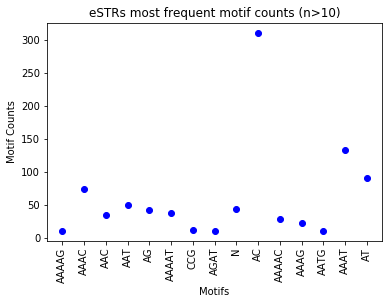

1020

In [61]:
Motifs = list(set(list(data_e['motif'])))
Mo_counts=[list(data['motif']).count(x) for x in Motifs]
Estr = data_e.shape[0]
Str = data.shape[0]
FMotifs = [x[0] for x in frequent_motifs]
sig_motifs=[]
All = []
print('\n We calculted at eSTRs sites the probability \n P (For finding an eSTR with a given motif by chance)== P()\n')
for M in Motifs:
    data_eM = data_e.loc[data_e['motif']==M]
    data_M = data.loc[data['motif']==M]
    Mestrs = data_eM.shape[0]
    Mstrs = data_M.shape[0]
    CTT = [[Mestrs, Estr - Mestrs] , [Mstrs-Mestrs , Str-Estr -(Mstrs - Mestrs)]] #contengency
    oddsratio, pv = ss.fisher_exact([CTT[0], CTT[1]])
####print ("P (", M, ")    ~~   ",pv*100,"%     with    OR=", oddsratio)
    All.append([M,list(data_e['motif']).count(M),-np.log10(pv),oddsratio])
    if pv<=0.05:
        sig_motifs.append([M,pv*100,oddsratio])
    
plt.plot([x[1] for x in frequent_motifs],'bo')
plt.xlabel('Motifs')
plt.ylabel('Motif Counts')
plt.title('eSTRs most frequent motif counts (n>10)')
plt.xticks([x for x in range(len([x[1] for x in frequent_motifs]))],[x[0] for x in frequent_motifs], rotation='vertical')
plt.show()
#plt.savefig("motifsE.png")   

Chance of an STR to be a eSTR in the ccausality set is  0.08531994981179424
The chances for an eSTR to have be an AC-rich is  0.4441176470588235
The chances of a STR to be AC-rich STR without being an eSTR is  0.9136155606407322
Now the likelihood ratio of an'AC-rich' STR is  0.48610998563483
1


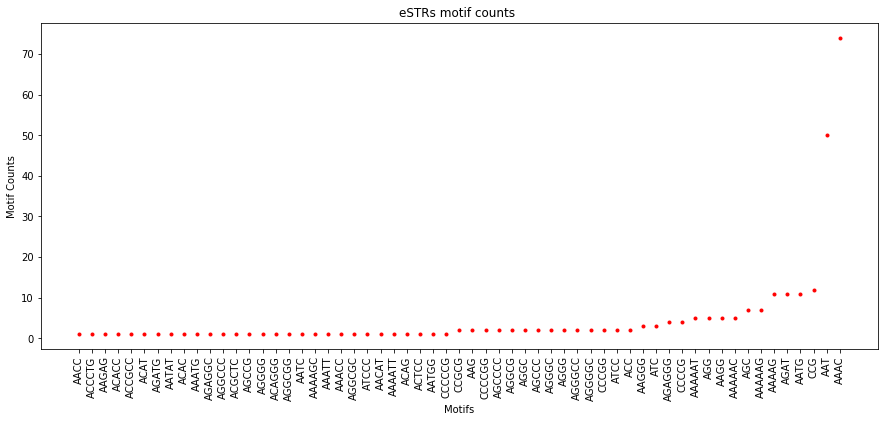

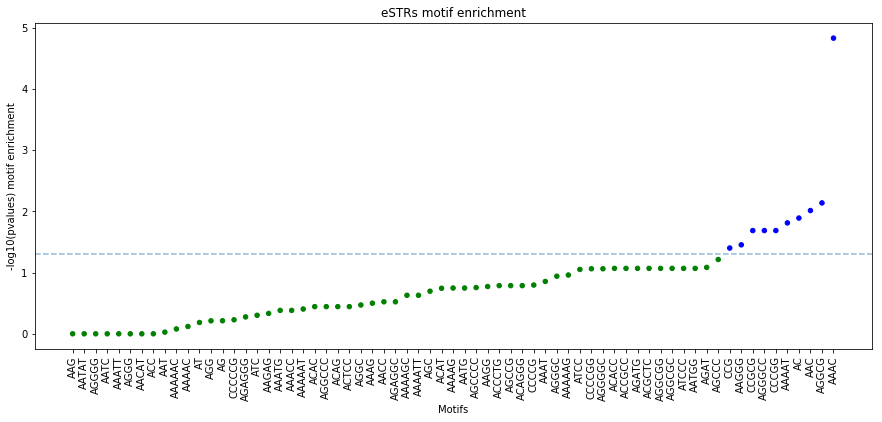

In [63]:
p=Estr/data.shape[0]
print("Chance of an STR to be a eSTR in the ccausality set is ", p)
print ("The chances for an eSTR to have be an AC-rich is ", data_eac.shape[0]/data_e.shape[0])
print("The chances of a STR to be AC-rich STR without being an eSTR is ",(data_ac.shape[0]-data_eac.shape[0])/(data_ac.shape[0]))     
print("Now the likelihood ratio of an'AC-rich' STR is ",(data_eac.shape[0]/data_e.shape[0])/((data_ac.shape[0]-data_eac.shape[0])/(data_ac.shape[0])) )

count_uniq_mo = sorted(list(set(Mo_counts)))
ordered_All = []
for u in count_uniq_mo:
    ordered_All=ordered_All + [x for x in All if x[1]==u]

print(min(count_uniq_mo))

plt.figure(figsize=(15,6))

#plt.hist([x for x in range(len(ordered_All))] , [x[1] for x in ordered_All] , color='orange')
plt.plot([x[1] for x in ordered_All],'r.')
plt.xlabel('Motifs')
plt.ylabel('Motif Counts')
plt.title('eSTRs motif counts ')
plt.xticks([x for x in range(len(ordered_All))],[x[0] for x in ordered_All], rotation='vertical')
plt.show()

count_uniq_mo = sorted(list(set([x[2] for x in All])))
ordered_All = []
for u in count_uniq_mo:
    ordered_All=ordered_All + [x for x in All if x[2]==u]

plt.figure(figsize=(15,6))
Y=[x[2] for x in ordered_All]
X=[x for x in range(len(ordered_All))]

Y = Y[:-1] ; X = X[:-1]

col = ['b' if x>-np.log10(0.05) else 'g' for x in Y ]

plt.scatter(X, Y, c=col, s=20, linewidth=1)
plt.xlabel('Motifs')
plt.ylabel('-log10(pvalues) motif enrichment')
plt.title('eSTRs motif enrichment')
plt.xticks(X,[x[0] for x in ordered_All], rotation='vertical')
plt.axhline(y=-np.log10(0.05), xmin=0, xmax=1, hold=None, alpha=0.5, ls='--')

plt.show()


/usr/lib64/python3.4/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'green' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/lib64/python3.4/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'blue' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/lib64/python3.4/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'cyan' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/lib64/python3.4/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'red' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html

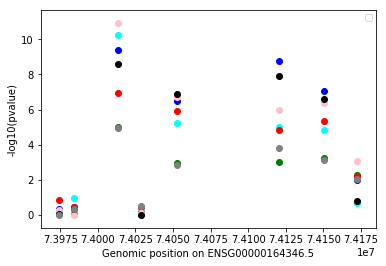

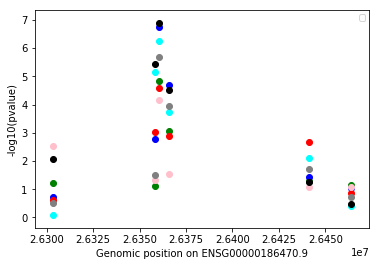

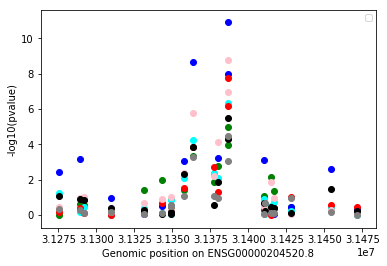

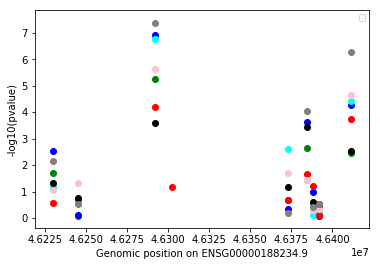

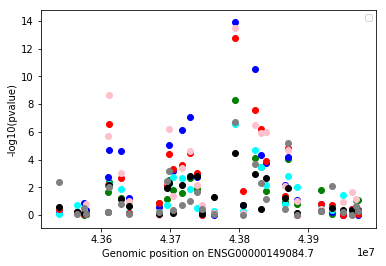

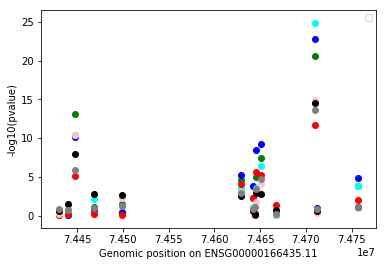

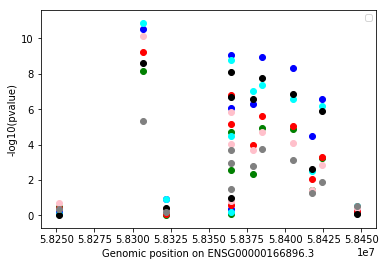

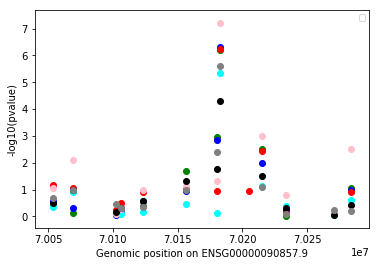

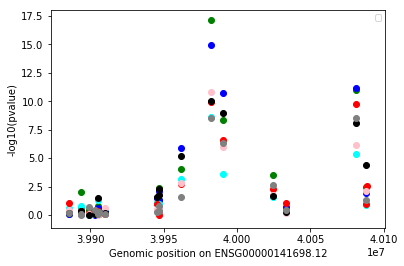

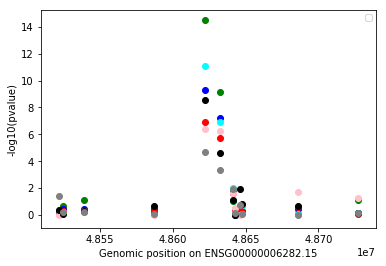

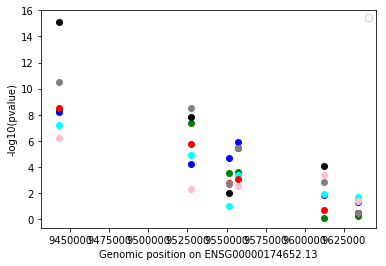

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tissues = ['WholeBlood','Cells-Transformedfibroblasts','Muscle-Skeletal','Lung','Artery-Tibial','Adipose-Subcutaneous', 'Esophagus-Mucosa']
colors = ['green','blue','cyan','red','pink','black','grey','yellow']
genes = ['ENSG00000164346.5','ENSG00000186470.9', 'ENSG00000204520.8','ENSG00000188234.9', 'ENSG00000149084.7', 'ENSG00000166435.11','ENSG00000166896.3', 'ENSG00000090857.9', 'ENSG00000141698.12', 'ENSG00000006282.15', 'ENSG00000174652.13']

for G in genes:
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    i=0

    for tissu in tissues[:7]:
        #print(tissu)
        File='/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/'+tissu+'/Lin_Reg_OutFin.txt'   #'PQValues.txt'
        File1=pd.read_csv(File, sep='\t')
        SET = File1.loc[File1['gene']==G]
        ax.scatter(SET['str.start'], -np.log10(SET['p.wald']),color=colors[i], label=tissues[i])
        #print(SET['str.start','p.wald'])
        i=i+1


        #print(tissu)
    ax.set_xlabel('Genomic position on '+G)
    ax.set_ylabel('-log10(pvalue)')
    plt.legend(colors, tissues,loc='upper right', ncol=3, fontsize=8)
    plt.show()
    


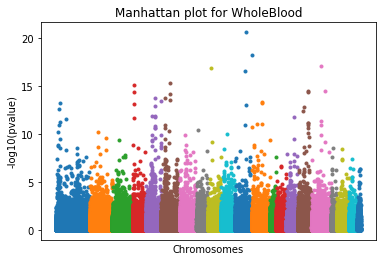

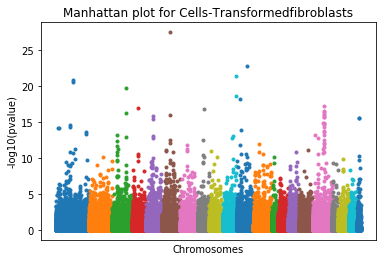

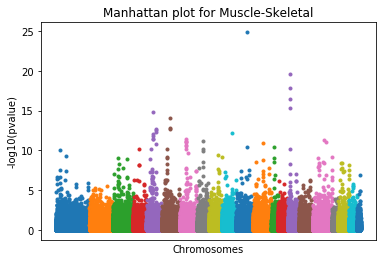

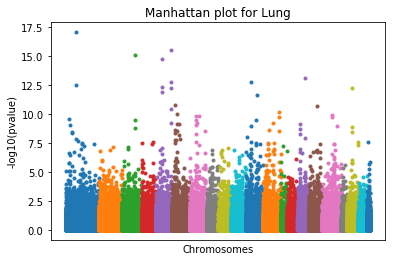

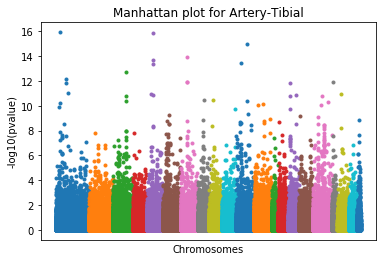

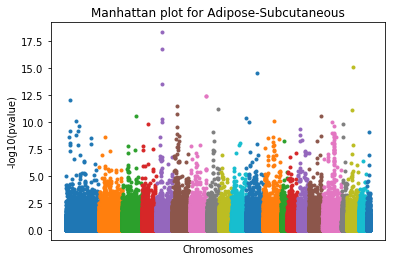

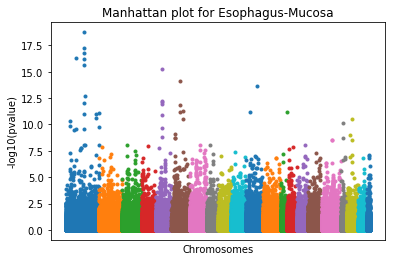

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tissues = ['WholeBlood','Cells-Transformedfibroblasts','Muscle-Skeletal','Lung','Artery-Tibial','Adipose-Subcutaneous', 'Esophagus-Mucosa']
tissu = tissues[0]

#OUT3=pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/SUMMARY/LR_SummaryTest_Table.tsv", sep='\t')

for tissu in tissues:
    OUT = pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/"+tissu+"/Lin_Reg_OutFin.txt", '\t')
    #CHH = OUT.loc[OUT['chrom']=='chr'+str(i)]['str.start']
    n=1; p=1
    colors=['black','grey']

    for i in range(1,22):
        CHH = OUT.loc[OUT['chrom']=='chr'+str(i)]
        X=[x for x in range(n,CHH.shape[0]+n)]

        plt.plot(X, -np.log10(CHH['p.wald']), ls='', marker='.', linewidth=8)    #many colors
        #plt.scatter(X, -np.log10(CHH['p.wald']),color=colors[p], marker='.') #alternate 2 colors

        plt.xticks([])
        n=X[-1]
        if p==0: 
            p=1
        else:
            p=0
    plt.xlabel('Chromosomes')
    plt.ylabel('-log10(pvalue)')
    plt.title('Manhattan plot for '+tissu)
    plt.show()



